# Guided Capstone Step 3 Exploratory Data Analysis

This is the third step in the Data Science Method. We introduced this topic in the last subunit. With Data Wrangling out of the way we can progress to the Exploratory Data Analysis section. In this exercise, you will learn to build data profiles and plots, including relationship plot and data correlation plot. You will also implement k-means clustering, complete clusters, and update data frame as a CSV file. Let's get started! 
  
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as we did in step 2 and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**<font color='teal'> If you need to change your path refer back to step 2 on how to do that. Then load the csv file you created in step 2, remember it should be saved inside your data subfolder and print the first five rows.</font>**

In [2]:
ski_new = pd.read_csv("step2_output.csv")

#save it inside data subfolder - why isn't this working?
#path=r"C:\Users\Robert Malka\Desktop\Springboard\Unit 6\data\step2_output.csv"
#os.chdir(path)

ski_new.head()

,Unnamed: 0,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


# Build data profile tables and plots 

**<font color='teal'> Print out the summary stats table transposed to fit on the screen using the `describe()` function.</font>**

In [3]:
ski_new.describe()

,Unnamed: 0,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
count,330.000000,330.000000,330.000000,330.000000,330.000000,164.000000,330.000000,330.000000,330.000000,330.00000,...,330.000000,330.000000,284.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,187.000000
mean,164.500000,4591.818182,1215.427273,3374.000000,0.172727,0.006098,0.184848,1.018182,0.933333,1.50000,...,1.433231,739.801223,174.873239,115.103943,63.656535,185.316456,57.916957,64.166810,120.053004,100.395722
std,95.407023,3735.535934,947.864557,3117.121621,0.559946,0.078087,0.651685,2.198294,1.312245,1.61913,...,1.147352,1807.868079,261.336125,32.231212,109.263494,133.424094,23.898798,22.571324,28.742976,105.169620
min,0.000000,315.000000,60.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,8.000000,2.000000,3.000000,6.000000,18.000000,15.000000,17.000000,30.000000,2.000000
25%,82.250000,1403.750000,461.250000,869.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.600000,85.000000,50.000000,100.000000,50.000000,71.250000,43.000000,49.000000,101.250000,40.000000
50%,164.500000,3127.500000,964.500000,1561.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,...,1.000000,200.000000,100.000000,115.103943,58.000000,158.000000,57.916957,64.166810,120.053004,72.000000
75%,246.750000,7806.000000,1800.000000,6325.250000,0.000000,0.000000,0.000000,1.000000,1.000000,2.00000,...,2.000000,739.801223,200.500000,130.000000,68.750000,278.750000,67.000000,72.000000,136.000000,114.000000
max,329.000000,13487.000000,4425.000000,10800.000000,4.000000,1.000000,6.000000,15.000000,8.000000,8.00000,...,6.000000,26819.000000,3379.000000,305.000000,2019.000000,669.000000,179.000000,179.000000,305.000000,650.000000


**<font color='teal'> Histograms are an excellent way to review the range and density of values for each numeric features in your data set and build data profiles. Plot the histograms for all numeric features and adjust the bins size to 25.</font>**

'\nfig = plt.figure()\n\npatterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]\n\nax1 = fig.add_subplot(111)\nfor i in range(len(patterns)):\n    ax1.bar(i, 3, color=\'red\', edgecolor=\'black\', hatch=patterns[i])\n\n\nplt.show()\n\n'

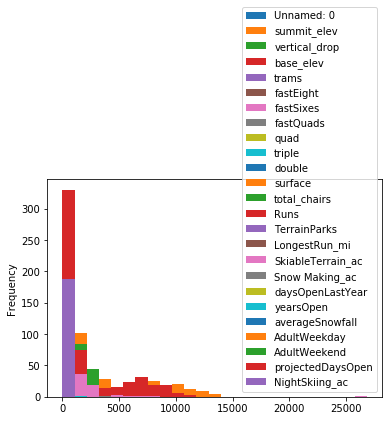

In [4]:
ski_new.plot.hist(bins=25)


'''
fig = plt.figure()

patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

ax1 = fig.add_subplot(111)
for i in range(len(patterns)):
    ax1.bar(i, 3, color='red', edgecolor='black', hatch=patterns[i])


plt.show()

'''

#Thanks to Justin Huang for help with colorblind chart! (though actually, somehow still not working.
#need some help to make sense of how this works.)

Look for similarities in the features that may indicate that they are duplicates or highly correlated features. Make a note of your findings and any other interesting insights you find about these numeric features.

**<font color='teal'> Okay, now you should be getting a sense for what the data look like. Let's create a barplot for the categorical features `Region` and `state` where the heights of the bars are the counts of each level in that variable. </font>**

**<font color='teal'>State Levels Plot</font>**

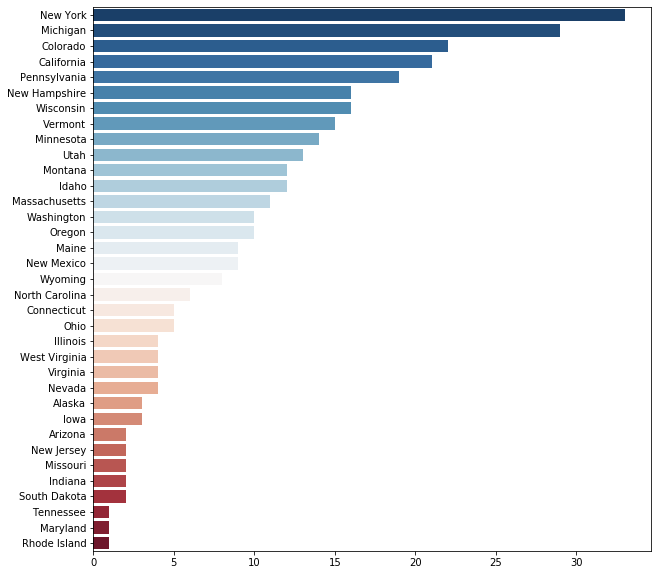

In [5]:
# Uncomment the following code to get your visualization started 
f, ax = plt.subplots(figsize=(10, 10))

#how does the above line of code work? Trying to understand why both f and ax are defined, and what they do here.
#NOTE: We are counting how many instances of each state/region exist in the data, i.e. how many resorts exist in
   #each region/state.

# plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, 
  #ax = plt.subplots() you unpack this tuple into the variables fig and ax. Having fig is useful if you want to 
  #change figure-level attributes or save the figure as an image file later (e.g. with 
  #fig.savefig('yourfilename.png')). You certainly don't have to use the returned figure object but many people do 
  #use it later so it's common to see. Also, all axes objects (the objects that have plotting methods), have a 
  #parent figure object anyway, thus:

  #fig, ax = plt.subplots()

  #is more concise than:
    
  # fig = plt.figure()
  # ax = fig.add_subplot(111)

#what is an axes object? What is a figure object?

# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(ski_new.state.value_counts())


#what exactly is happening in the line above? what is df.state? 
   #It's LITERALLY the column "state". -- didn't expect the syntax to look that way. very clear now.
#The value_counts() function is used to get a Series containing counts of unique values. The resulting object will 
    #be in descending order so that the first element is the most frequently-occurring element.


# Get the state names by calling list() on the x.index
names = list(x.index)

# Get the values by plugging x.state into the list() function

#how does that help get our values? 
#why do we need the list function particularly? -- ohh it's like len() in Python. Counting.
values = list(x.state)


#Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely 
   #integrated with pandas data structures.
#https://seaborn.pydata.org/introduction.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html



# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a seaborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r")

**<font color='teal'>Region Levels Plot</font>**

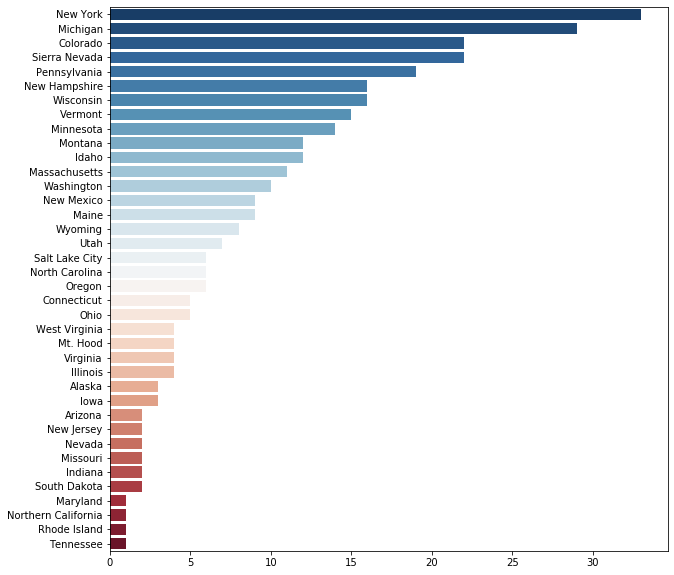

In [6]:
# Now do the same for regions! 


# Uncomment the following code to get your visualization started 
f, ax = plt.subplots(figsize=(10, 10))

# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(ski_new.Region.value_counts())


#what exactly is happening in the line above? what is df.state? 
#The value_counts() function is used to get a Series containing counts of unique values. The resulting object will 
    #be in descending order so that the first element is the most frequently-occurring element.


# Get the state names by calling list() on the x.index
names = list(x.index)

# Get the values by plugging x.state into the list() function

#how does that help get our values?
#why do we need the list function particularly? -- ohh it's like len() in Python. Counting.
values = list(x.Region)


#Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely 
   #integrated with pandas data structures.
#https://seaborn.pydata.org/introduction.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html



# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a seaborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r")

By reviewing the State and Regions counts plots you should notice that the Region feature is nearly identical to the state and therfore we can remove from the dataframe.**<font color='teal'> Remove the `Region` column using the drop function.</font>**

In [7]:
del ski_new['Region']
del ski_new['Unnamed: 0']

#ski_new['Region'].drop() didn't work, even when i added axis=1. also, ski_new['Region'].drop didn't work.

In [8]:
ski_new.head()

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,3939,2500,250,1,0.0,0,2,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0.0,0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,2090,294,1796,0,0.0,0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0.0,1,0,2,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,11100,1800,9200,0,NaN,0,1,2,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


## Anomalies & Outliers - Review boxplots

**<font color='teal'> Print boxplot for every column</font>**

Hint: you'll see the methodology here in this article on Exploratory Data Analysis [here](nce-method-dsm-exploratory-data-analysis-bc84d4d8d3f9). 

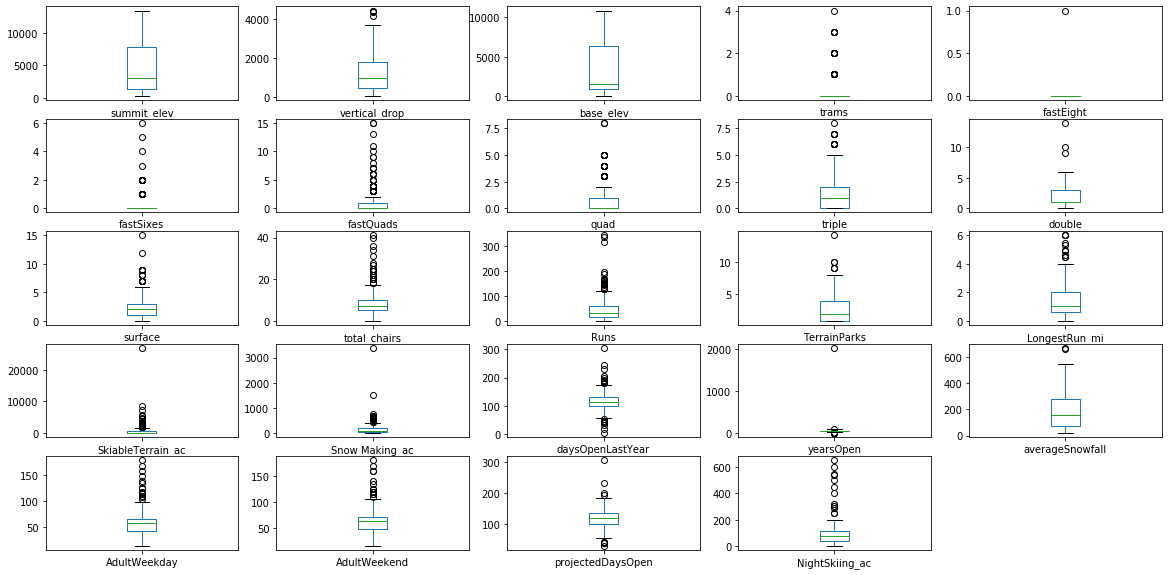

In [9]:
#the link above doesn't work.

ski_new.plot.box(figsize=(20,10), subplots=True, layout=(5,5))
plt.show()
    
    
#i did ski_new.plot(kind='box'), and that worked... badly. the variables were unclear, plots were impenetrable.
    #we need to establish figsize. Does this commented line of code assume subplots = true or no?
    #cool help with layout=5,5.

You need to create boxplots and  histograms to evaluate the data for potential outliers or data anomalies. Generally, outliers are defined as observations that differ significantly from the other values in the dataset or feature. 

Reviewing the distribution of values by column will help you  interpret this. Outliers are extreme values that fall far outside the mean and standard deviation of a set of observations. They  can mislead the training process in building machine learning models. Outliers may be real anomalies in the observations or artificial errors. 

One method for outlier analysis is extreme value analysis using a boxplot, which assumes a normal distribution. The figure below describes the components of a boxplot. Notice the outlier is the point outside the upper whisker end. 

![](AnnotatedBoxplot.png)  
<font color='teal'>Follow these steps:  

1. Create boxplots - earlier step
2. Apply outlier removal using the Interquartile range or replacement 
3. Review how many observations were removed</font>

Hint: Recall from your statistics prework that a common definition of an outlier is an observation lying more than (1.5 * the Interquartile range) above the third quartile, or more than just that much below the first quartile.

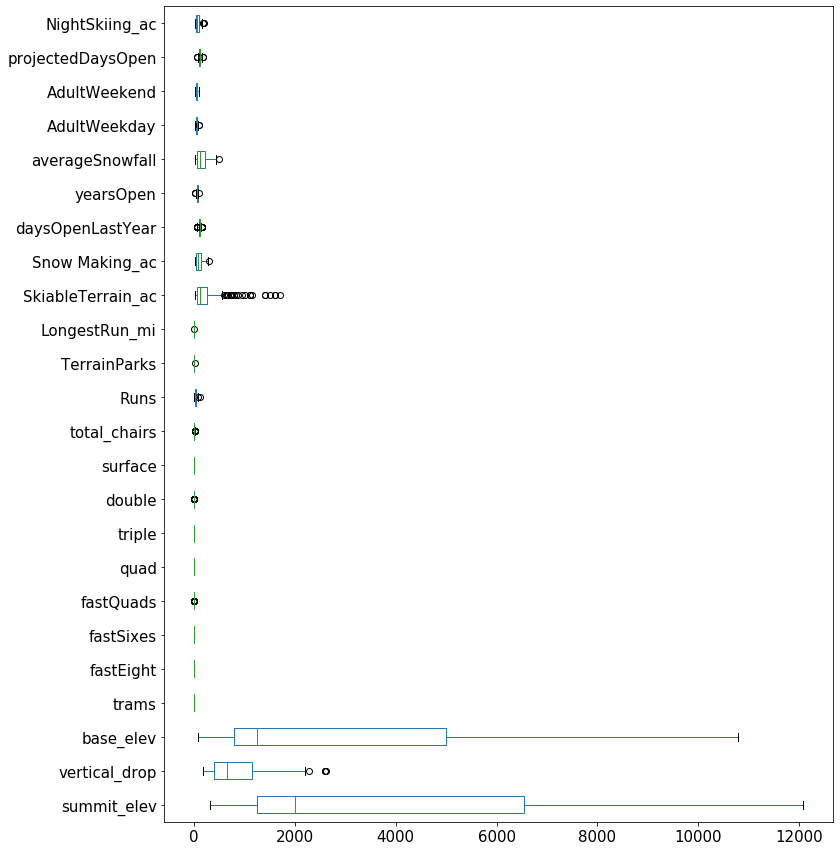

In [10]:
#I am most interested in understanding what we do with outliers generally - or what to do with outliers when we
    #suspect that they indicate something extraordinary, especially re: machine learning.
    #how to not be deceived? How to believe the data? When do we know for sure it's an artificial error vs not?




# Let's get the Interquartile range, or IQR. This is equal to Q3 - Q1. 
# First, let's use the quantile() method to get the first quartile, and store it in a variable called Q1.
# We'll want to plug 0.25 into the quantile method. 
Q1 = ski_new.quantile(0.25)

# Now get Q3 and store in a variable called Q3. 

Q3 = ski_new.quantile(0.75)

# Now calculate the IQR, storing it in a variable called IQR.

IQR = Q3 - Q1

# Make a variable called `dfno`, and assign it the value: df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]. 
# This filters on our existing dataframe, picking out just those observations that are NOT outliers. 

dfno = ski_new[~((ski_new < (Q1 - 1.5 * IQR)) | (ski_new > (Q3 + 1.5 * IQR))).any(axis=1)]
    #articulate this in front of someone.
    #.any() = Return whether any element is True, potentially over an axis.
    # | = or, ~ = not

# We now want to make a boxplot of this new dataframe dfno. 
ski_box = dfno.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))


#this boxplot is also really unhelpful. I can't make the specific variables out b/c of elev vars. How to fix this?


#learned something new! Shift+Tab shows me a popup of the DataFrame and (some?) variables! :)
  #What's it for, generally?

In [11]:
# Print the shapes of our dataframes df and dfno to compare the number of observations in each. 

print(ski_new.shape)
print(dfno.shape)

(330, 26)
(177, 26)


There are many ways to discover and remove outliers, and what counts as a sensible way of doing so depends on your problem, your methodology for solving that problem, and the nature of your data. 

Each method will have its merits and demerits. As we can see, in this instance, we've lost a great many observations! 

There is no hard and fast rule as to which outlier removal method is best in all cases, and you will have to exercise your good judgement in arriving at an appropriate method for your problem at hand. We will cover outlier removal in more depth in units 7 (Data Wrangling) and 10 (Statistics for Exploratory Data Analysis) of the course. 

There are many possible response variables you could have identified in Step 1 of this guided capstone. However, for the rest of this guided capstone project, we will focus on increasing revenue by increasing the lift ticket prices and the number of days the resort is open per year. In this case, we need to investigate the expected lift ticket price for Big Mountain based on all the other given resort characteristics. In addition, we want to predict the number of days the resort will be open each season.

<font color='teal'>**Review the `AdultWeekday`,`AdultWeekend` response variable distributions**</font>

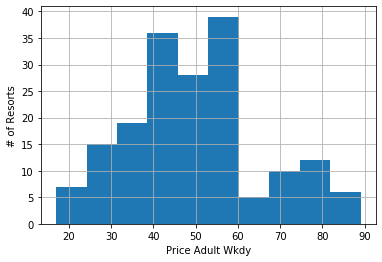

In [12]:
# Make a histogram of the 'AdultWeekday' column of the dfno dataframe. 
# You'll want to call hist() on that column 

dfno['AdultWeekday'].hist()
plt.xlabel('Price Adult Wkdy')
plt.ylabel('# of Resorts')
plt.show()

#xlabel='Prices', ylabel='Occurrences' within hist????
      #I got it! :)
#i straight up don't understand what the x and y axes are here.
   #the prices aren't even manifesting here! Some are in the hundreds. WHERE ARE THOSE PRICES?
    # X seems to be prices. Y occurrences of those prices. BUT HOW DO I KNOW?
        #just made an assumption because IQR removed the outliers, so it makes sense we'd get up to ~$90 rather 
            #than $110 &c.
    
    #Unhelpful...

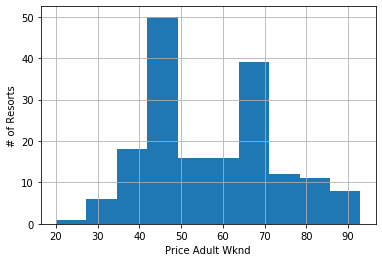

In [13]:
# Do the same but with the AdultWeekend column 

dfno['AdultWeekend'].hist()
plt.xlabel('Price Adult Wknd')
plt.ylabel('# of Resorts')
plt.show()

<font color='teal'>**Review the `daysOpenLastYear`,`projecteDaysOpen` response variable distributions**</font>

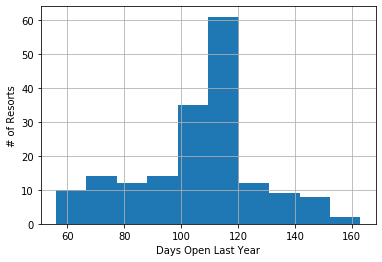

In [14]:
# Do the same as above! You got this :) 

dfno['daysOpenLastYear'].hist()
plt.xlabel('Days Open Last Year')
plt.ylabel('# of Resorts')
plt.show()
#ax1 = fig.add_subplot(211)
#ax1.set_ylabel('# of Resorts')
#ax1.set_xlabel('Days Open Last Year')

#these above don't work.
#https://matplotlib.org/3.1.0/gallery/pyplots/fig_axes_labels_simple.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

#clearer here -- number of days open in x, number of occurrences across resorts in y.

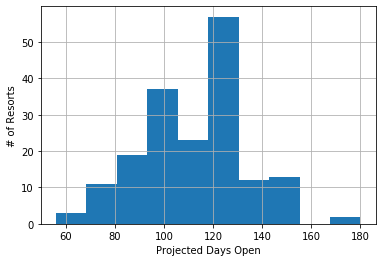

In [15]:
dfno['projectedDaysOpen'].hist()
plt.xlabel('Projected Days Open')
plt.ylabel('# of Resorts')
plt.show()

#clearer here -- number of projected days open in x, number of occurrences across resorts in y.

#Still, how to label axes?

#How exactly do we know there aren't any data issues to mitigate, looking at this plot? What are the grounds
    #to know that?

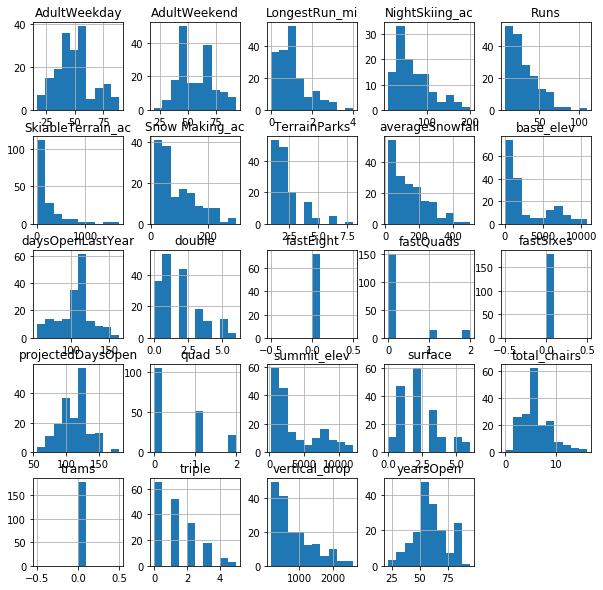

In [16]:
hist = dfno.hist(bins=10,figsize =(10,10))

#why does this show every variable on hist? (what in the syntax suggests that?)
   #why are there 25 histograms with bins=10? What is bins doing then?

After reviewing these respons varible distributions, there doesn't appear to be any data issues to mitigate. Now, we move on to investigating feature relationship and interactions between the features the response.

# Explore data relationships

<font color='teal'>**Create pairplots or what is commonly referred to as biplots**</font>

Hint: pairplots are covered in this article on EDA [here](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-exploratory-data-analysis-bc84d4d8d3f9). 

C:\Users\Robert Malka\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Robert Malka\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


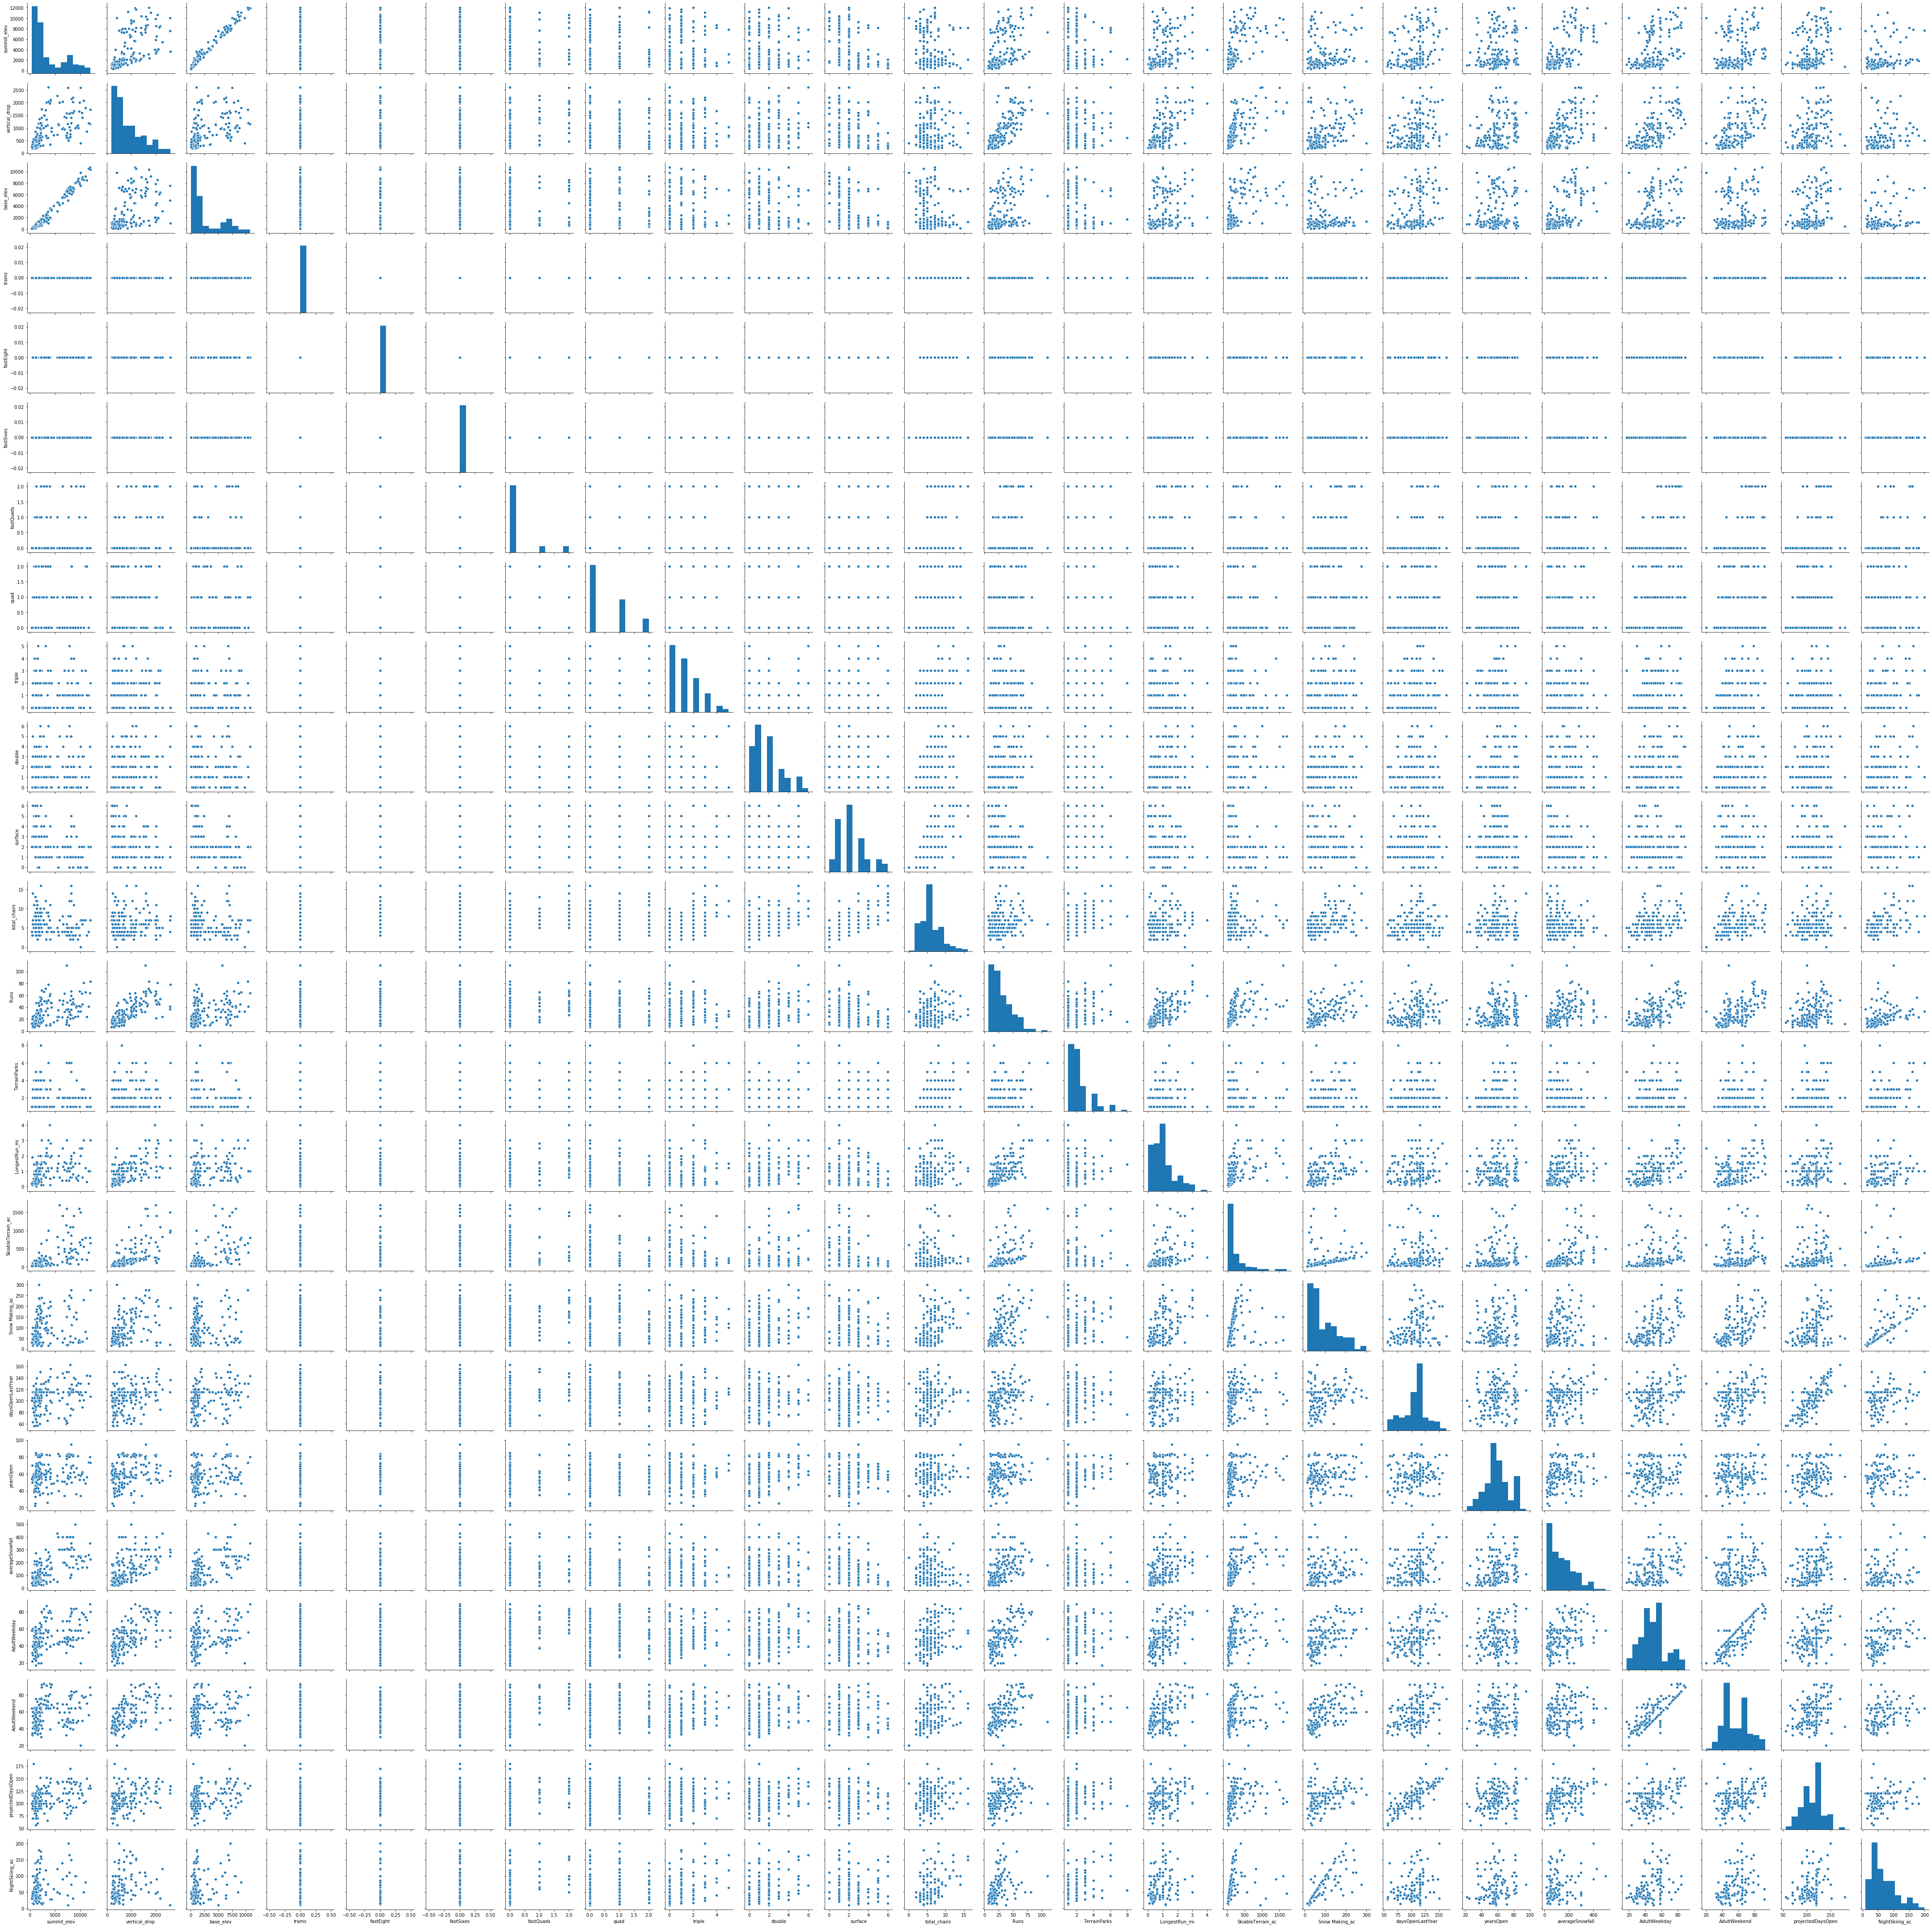

In [17]:
g = sns.pairplot(dfno)

#ahhh this is cool -- each var's relationship to other vars. interesting...
#(i got this code from the link above)

# Identification and creation of features

<font color='teal'>**Create a Pearson correlation heatmap**</font>

In [18]:
#Calculate the correlation coefficients
corr = dfno.corr(method='pearson', min_periods=1) 
#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')

C:\Users\Robert Malka\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
summit_elev,1,0.62,0.99,nan,nan,nan,0.15,-0.05,0.06,0.08,-0.38,-0.1,0.5,-0,0.37,0.62,0.21,0.29,0.21,0.68,0.41,0.25,0.29,0.24
vertical_drop,0.62,1,0.49,nan,nan,nan,0.4,-0.05,0.08,0.22,-0.33,0.06,0.74,0.12,0.62,0.67,0.42,0.27,0.25,0.57,0.58,0.53,0.31,0.22
base_elev,0.99,0.49,1,nan,nan,nan,0.09,-0.05,0.05,0.05,-0.35,-0.13,0.41,-0.02,0.29,0.56,0.14,0.27,0.18,0.64,0.34,0.17,0.26,0.23
trams,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fastEight,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fastSixes,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fastQuads,0.15,0.4,0.09,nan,nan,nan,1,0.14,0.17,0.13,0.06,0.43,0.37,0.23,0.38,0.19,0.48,0.22,0.02,0.08,0.46,0.47,0.24,0.39
quad,-0.05,-0.05,-0.05,nan,nan,nan,0.14,1,0.16,-0.18,0.2,0.36,0.07,0.03,-0.04,-0.07,0.18,0.14,-0.08,-0.19,0.15,0.23,0.11,0.16
triple,0.06,0.08,0.05,nan,nan,nan,0.17,0.16,1,-0.12,0.1,0.52,0.13,0.33,0.11,-0.03,0.31,0.06,-0.03,-0.02,0.24,0.31,0.08,0.36
double,0.08,0.22,0.05,nan,nan,nan,0.13,-0.18,-0.12,1,-0.03,0.47,0.33,0.3,0.21,0.26,0.29,0.04,0.22,0.14,0.21,0.22,0.13,0.27


When reviewing the Pearson correlation coefficient heatmap, you can see substantial differences in the correlations compared to the response variable(s) as well as in the features when compared to each other. The heatmap helps identify features that suffer from multi-collinearity. 

<font color='teal'>**Use the correlation matrix displayed in the heatmap to select and remove collinear features. Remember to exclude the response variable(s) from the matrix to ensure they are retained in your final model development dataset. Then select those features that are more than 95% correlated for removal.**</font>

Step 1: Create a correlation matrix that excludes your response variables. 

Step 2: Select the upper triangle of the correlation matrix. This is because a correlation matrix actually contains the same information, twice over!

Step 3: Find the index of feature columns with a correlation greater than 0.95.

In [21]:
#I need to be walked through exactly what's happening here.
#what's step one doing exactly?
#what's an upper triangle?
#I understand step 3.


# Step 1. Call the variable corr_matrix

corr_matrix = dfno.drop(['AdultWeekday','AdultWeekend','daysOpenLastYear','projectedDaysOpen'], axis=1).corr().abs()

# Step 2. Uncomment the following code to get the upper triangle of the correlation matrix 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Step 3. This code iterates through our columns and gets the index of any that have a correlation > 0.95
# Call the variable to_drop, get the columns of our 'upper' variable, make sure the threshold is 0.95.
#why does this run an error?
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [22]:
# Let's see those features! 
print('Features selected to drop include:',to_drop)

Features selected to drop include: ['base_elev']


In [23]:
print('Reduced dataframe size: ',dfno.drop(dfno[to_drop], axis=1).shape)

Reduced dataframe size:  (177, 25)


In [39]:
# Now replace dfno by the result of dropping the columns in the to_drop variable from it

#I don't know how to do this.

TypeError: list indices must be integers or slices, not list

Now we address the feature creation piece of this step. We can create additional features through many methods such as: combining several features, grouping features into bins, or even by applying an unsupervised classification algorithm, such as k-means clustering and using the clusters as features in our model development dataset.

Clustering essentially finds patterns in data when we don't know in advance what we're looking for. The K-means algorithm is one way of doing clustering. It puts our data into groups (or 'clusters') which can then become features for further analysis. What the k-means algorithm outputs, though, depends on the number of clusters we set out to have. We will use a method called 'Elbow plotting' to determine this number. 

We will cover clustering and k-means thoroughly in the Unsupervised Learning unit of this course, but for now, we'll use it for feature creation alone, which is an integral part of Exploratory Data Analysis. Don't worry if you don't understand the details just yet. 

Run the next two cells below to create an Elbow plot. The Elbow plot is a diagnostic tool that helps us determine the number of clusters to include in our k-means clustering implementation. 

In this example, the error between clusters and within clusters is compared for a range of 1 to 11 clusters, and it appears the elbow is between two and four, therefore we set the parameter k = 3.

In [45]:
from sklearn.cluster import KMeans
x = dfno.drop(['Name','state'], axis =1).values

#suddenly it's a list object?! What's going on!?

#https://dscareercommunity.springboard.com/t/q6hy7tn/guided-capstone-section-3-kmeans
   #For an explanation of what we're doing here.
    #Also: ask about data leakage risk. What does that mean?

AttributeError: 'list' object has no attribute 'drop'

In [46]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<font color='teal'>**Fit the kmeans algorithm with the k parameter set to three and plot the results.**</font>

In [32]:
# This code will fit the k-means algorithm with our k parameter set to three, and plot the results. Cool, huh? 
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=50, cmap='viridis')

centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


TypeError: '(slice(None, None, None), 0)' is an invalid key

<font color='teal'>**Add the clusters to your dataframe as a new column to include in the next step and write the updated dataframe out as csv. Save the dataframe in the data folder and name it `step3_output.csv`.**</font>

In [35]:
# Make a new column in your dfno dataframe called 'clusters', and assign it the variable: y_kmeans3

dfno['clusters'] = y_kmeans3

TypeError: list indices must be integers or slices, not str

In [48]:
# Write your dataframe to csv 
ski_new.to_csv("step3_output.csv")